<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0505_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import heapq
import matplotlib.pyplot as plt

In [ ]:
def eucli(p1, p2):
    return sum((p1 - p2)**2)**0.5

assert eucli(np.array([0, 3]), np.array([4, 0])) == 5.
assert eucli(np.array([0, 0]), np.array([1, 1])) == 2**0.5

In [ ]:
class MyKNN:
    def __init__(self, k, random_state=42, dist=eucli):
        self.k = k
        self.dist = dist
        random.seed(random_state)
        np.random.seed(random_state)

    def fit(self, X, y):
        self.labels = np.unique(y)
        self.lbl2idx = {lbl:i for i, lbl in enumerate(self.labels)}

    def _predict_one(self, p1):
        probs = [0]*len(self.labels)
        q = []
        for i, p2 in enumerate(X):
            heapq.heappush(q, (self.dist(p1, p2), i))

        for _ in range(self.k):
            _, i = heapq.heappop(q)
            probs[self.lbl2idx[y[i]]] += 1

        for i in range(len(probs)):
            probs[i] /= self.k

        return np.argmax(probs)

    def predict(self, points):
        y_hat = np.zeros((len(points)))
        for i, p in enumerate(points):
            y_hat[i] = self._predict_one(p)

        return y_hat

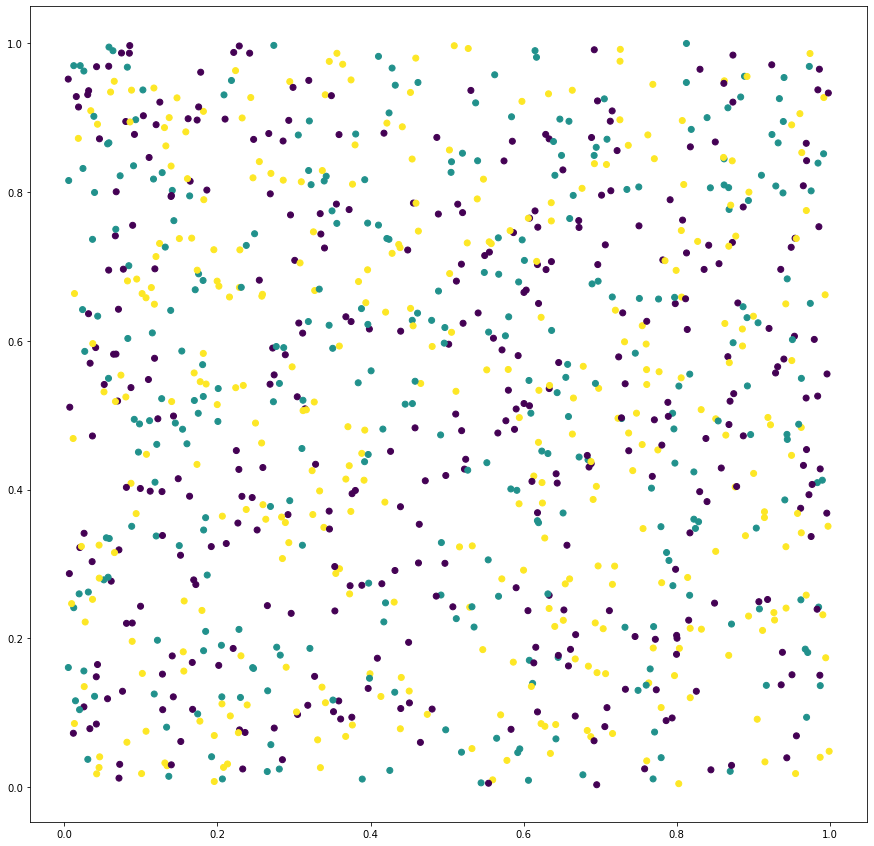

In [ ]:
m = 1000
X = np.random.rand(m, 2)
y = np.random.randint(3, size=(m))

plt.subplots(figsize=(15, 15))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
model = MyKNN(k=5)
model.fit(X, y)
model.predict(np.random.rand(10, 2))

array([2., 2., 0., 0., 1., 1., 0., 1., 0., 0.])